## Import

In [2]:
import xarray as xr
import pandas as pd
import rasterio
from rasterio.mask import mask
from rasterio.transform import from_bounds
import rioxarray
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

## Init

Your data repository should look like **this** after downloading all input data:

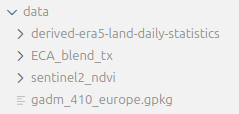

In [3]:
main_data_folder = "data/"

# Administration geometries from GADM

[GADM](https://gadm.org/) provides maps and spatial data for all countries and their sub-divisions. Here is a light version limited to European countries.

In [4]:
gadm_filepath = main_data_folder + "gadm_410_europe.gpkg"

## Parametrize

In [5]:
country_code = "ESP" # Spain
cityname = "Madrid"

## Manipulate and vizualize

In [6]:
gadm_gdf = gpd.read_file(gadm_filepath)

print(f"Number of rows in GADM: {len(gadm_gdf)}")
gadm_gdf.head()

Number of rows in GADM: 106252


,UID,GID_0,NAME_0,GID_1,NAME_1,ENGTYPE_1,GID_2,NAME_2,ENGTYPE_2,GID_3,...,ENGTYPE_3,GID_4,NAME_4,ENGTYPE_4,GID_5,NAME_5,ENGTYPE_5,COUNTRY,CONTINENT,geometry
0,333,ALA,Åland,ALA.1_2,Archipelago,Sub-Region,ALA.1.1_2,Brändö,Municipality,,...,,,,,,,,Åland,Europe,"MULTIPOLYGON (((20.98333 60.64167, 20.98125 60..."
1,334,ALA,Åland,ALA.1_2,Archipelago,Sub-Region,ALA.1.2_2,Föglö,Municipality,,...,,,,,,,,Åland,Europe,"MULTIPOLYGON (((20.60028 59.81311, 20.60027 59..."
2,335,ALA,Åland,ALA.1_2,Archipelago,Sub-Region,ALA.1.3_2,Kökar,Municipality,,...,,,,,,,,Åland,Europe,"MULTIPOLYGON (((20.83333 60.03333, 20.83301 60..."
3,336,ALA,Åland,ALA.1_2,Archipelago,Sub-Region,ALA.1.4_2,Kumlinge,Municipality,,...,,,,,,,,Åland,Europe,"MULTIPOLYGON (((20.76042 60.46667, 20.75833 60..."
4,337,ALA,Åland,ALA.1_2,Archipelago,Sub-Region,ALA.1.1_2,Sottunga,Municipality,,...,,,,,,,,Åland,Europe,"MULTIPOLYGON (((20.56875 60.18333, 20.56667 60..."


In [7]:
filtered_gadm_gdf = gadm_gdf[(gadm_gdf.GID_0 == country_code) & (gadm_gdf.NAME_2 == cityname)]

print(f"Number of rows in GADM after filtering: {len(filtered_gadm_gdf)}")
filtered_gadm_gdf.head()

Number of rows in GADM after filtering: 181


,UID,GID_0,NAME_0,GID_1,NAME_1,ENGTYPE_1,GID_2,NAME_2,ENGTYPE_2,GID_3,...,ENGTYPE_3,GID_4,NAME_4,ENGTYPE_4,GID_5,NAME_5,ENGTYPE_5,COUNTRY,CONTINENT,geometry
90995,305016,ESP,Spain,ESP.8_1,Comunidad de Madrid,Autonomous Community,ESP.8.1_1,Madrid,Province,ESP.8.1.1_1,...,Comarca,ESP.8.1.1.1_1,Alameda del Valle,Municipality,,,,Spain,Europe,"MULTIPOLYGON (((-3.89887 40.95908, -3.89501 40..."
90996,305017,ESP,Spain,ESP.8_1,Comunidad de Madrid,Autonomous Community,ESP.8.1_1,Madrid,Province,ESP.8.1.1_1,...,Comarca,ESP.8.1.1.2_1,Berzosa del Lozoya,Municipality,,,,Spain,Europe,"MULTIPOLYGON (((-3.4963 40.99471, -3.49791 40...."
90997,305018,ESP,Spain,ESP.8_1,Comunidad de Madrid,Autonomous Community,ESP.8.1_1,Madrid,Province,ESP.8.1.1_1,...,Comarca,ESP.8.1.1.3_1,Braojos,Municipality,,,,Spain,Europe,"MULTIPOLYGON (((-3.70555 41.07751, -3.69502 41..."
90998,305019,ESP,Spain,ESP.8_1,Comunidad de Madrid,Autonomous Community,ESP.8.1_1,Madrid,Province,ESP.8.1.1_1,...,Comarca,ESP.8.1.1.4_1,Buitrago del Lozoya,Municipality,,,,Spain,Europe,"MULTIPOLYGON (((-3.6451 40.95414, -3.65023 40...."
90999,305020,ESP,Spain,ESP.8_1,Comunidad de Madrid,Autonomous Community,ESP.8.1_1,Madrid,Province,ESP.8.1.1_1,...,Comarca,ESP.8.1.1.5_1,Bustarviejo,Municipality,,,,Spain,Europe,"MULTIPOLYGON (((-3.79052 40.84676, -3.786 40.8..."


In [8]:
one_city_gdf = filtered_gadm_gdf.dissolve()

one_city_gdf.head()

,geometry,UID,GID_0,NAME_0,GID_1,NAME_1,ENGTYPE_1,GID_2,NAME_2,ENGTYPE_2,...,NAME_3,ENGTYPE_3,GID_4,NAME_4,ENGTYPE_4,GID_5,NAME_5,ENGTYPE_5,COUNTRY,CONTINENT
0,"MULTIPOLYGON (((-4.55042 40.20185, -4.57506 40...",305016,ESP,Spain,ESP.8_1,Comunidad de Madrid,Autonomous Community,ESP.8.1_1,Madrid,Province,...,n.a. (175),Comarca,ESP.8.1.1.1_1,Alameda del Valle,Municipality,,,,Spain,Europe


<Axes: >

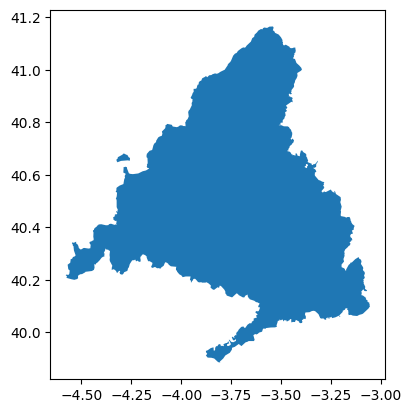

In [9]:
one_city_gdf.plot()

Warning! Depending on the country you're studying, the administrative level of the city might be different.

For example, "Berlin" in Germany requires the `gadm_gdf.NAME_2 == cityname` condition (ie. admin level 2), however "Lille" in France requires the `gadm_gdf.NAME_5 == cityname` condition (ie. admin level 5).

It can even vary within a country if a city is divided in boroughs (ex: "Paris" in France requires the `gadm_gdf.NAME_2 == cityname` condition (ie. admin level 2)).

# ERA5-Land Meteorological data (frequency = daily)

ERA5-Land is a reanalysis dataset providing a consistent view of the evolution of land variables over several decades at an enhanced resolution compared to ERA5.

The data, processed on a daily temporal resolution, originally stems from a public hourly dataset: [ERA5-Land hourly data from 1950 to present](https://cds.climate.copernicus.eu/datasets/reanalysis-era5-land?tab=overview) on the [Climate Data Store](https://cds.climate.copernicus.eu/).

The available land variables are:
- Daily maximum of hourly [2 metre temperature](https://apps.ecmwf.int/codes/grib/param-db/167) in Kelvin,
- Daily mean of hourly [total precipitation](https://apps.ecmwf.int/codes/grib/param-db/228) in meters,
- Daily mean of hourly [10 metre U wind component](https://apps.ecmwf.int/codes/grib/param-db/165) in meters per second,
- Daily mean of hourly [10 metre V wind component](https://apps.ecmwf.int/codes/grib/param-db/166) in meters per second.

In [10]:
era5_data_folder = main_data_folder + "derived-era5-land-daily-statistics/"

variable2statistic = {
    "2m_temperature": "daily_maximum",
    "total_precipitation": "daily_mean",
    "10m_u_component_of_wind": "daily_mean",
    "10m_v_component_of_wind": "daily_mean",
}

variable2datavar = {
    "2m_temperature": "t2m",
    "total_precipitation": "tp",
    "10m_u_component_of_wind": "u10",
    "10m_v_component_of_wind": "v10",
}

## Parametrize

In [11]:
variable = "2m_temperature"
year = 2020

In [12]:
statistic = variable2statistic[variable]
datavar = variable2datavar[variable]

## Manipulate and vizualize

Please open the [xarray User Guide](https://docs.xarray.dev/en/stable/user-guide/index.html) to see how to manipulate the data (especially in the "Core operations" chapter).

Here are a few examples of operations:

### One dataset

In [13]:
filepath = f"{era5_data_folder}{year}_{variable}_{statistic}.nc"

In [14]:
# Let xarray choose a suitable engine (or force 'netcdf4' if autodetect fails)

ds = xr.open_dataset(filepath)
print(ds)

<xarray.Dataset> Size: 338MB
Dimensions:     (valid_time: 366, latitude: 350, longitude: 660)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 3kB 2020-01-01 ... 2020-12-31
  * latitude    (latitude) float64 3kB 69.9 69.8 69.7 69.6 ... 35.2 35.1 35.0
  * longitude   (longitude) float64 5kB -25.0 -24.9 -24.8 ... 40.7 40.8 40.9
    number      int64 8B ...
Data variables:
    t2m         (valid_time, latitude, longitude) float32 338MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-10-03T16:43 GRIB to CDM+CF via cfgrib-0.9.1...


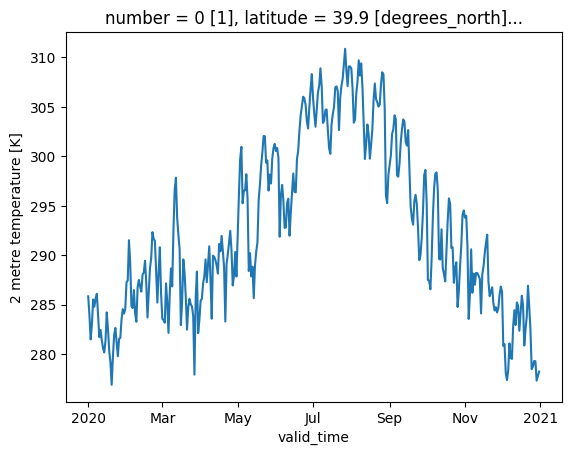

In [15]:
lat, lon = 39.8960, -2.4876
ds[datavar].sel(latitude=lat, longitude=lon, method="nearest").plot()

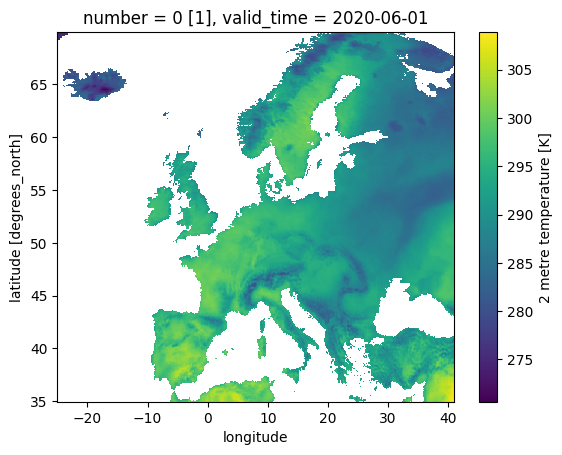

In [16]:
day = pd.to_datetime(f"{year}-06-01")

ds[datavar].sel(valid_time=day).plot()

### Multiple datasets

In [17]:
filepaths = glob(f"{era5_data_folder}*_{variable}_{statistic}.nc")

In [18]:
ds = xr.open_mfdataset(filepaths, combine="by_coords")
ds

<xarray.Dataset> Size: 2GB
Dimensions:     (valid_time: 2098, latitude: 350, longitude: 660)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 17kB 2020-01-01 ... 2025-09-28
  * latitude    (latitude) float64 3kB 69.9 69.8 69.7 69.6 ... 35.2 35.1 35.0
  * longitude   (longitude) float64 5kB -25.0 -24.9 -24.8 ... 40.7 40.8 40.9
    number      int64 8B 0
Data variables:
    t2m         (valid_time, latitude, longitude) float32 2GB dask.array<chunksize=(23, 22, 42), meta=np.ndarray>
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-10-03T16:43 GRIB to CDM+CF via cfgrib-0.9.1...

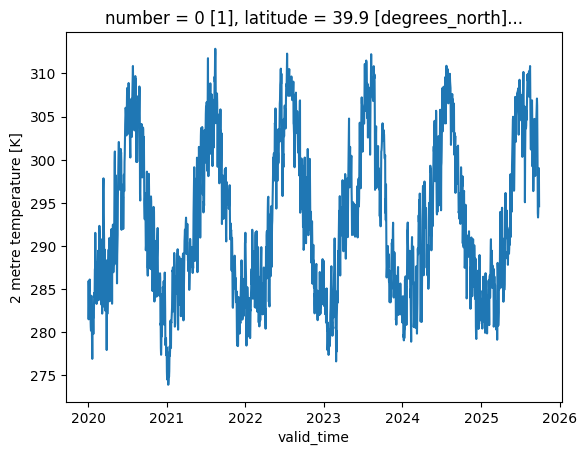

In [19]:
ds[datavar].sel(latitude=lat, longitude=lon, method="nearest").plot()

# Normalized Difference Vegetation Index from Sentinel-2 (frequency = every 3 months)

The Normalized difference vegetation index (known as NDVI) is a simple, but effective index for quantifying green vegetation. Its values range from -1 to 1. More details on [sentinelhub](https://custom-scripts.sentinel-hub.com/custom-scripts/sentinel-2/ndvi/).

In [20]:
ndvi_data_folder = main_data_folder + "sentinel2_ndvi/"

def quarter2timeperiod(year, quarter):
    if quarter == 1:
        return f"{year-1}-12-01_{year}-03-01"
    elif quarter == 2:
        return f"{year}-03-01_{year}-06-01"
    elif quarter == 3:
        return f"{year}-06-01_{year}-09-01"
    elif quarter == 4:
        return f"{year}-09-01_{year}-12-01"
    else:
        raise ValueError("quarter must be in 1, 2, 3, 4")

## Parametrize

In [21]:
available_years = [2020, 2021, 2022, 2023]
available_quarters = [1, 2, 3, 4]

In [22]:
year = 2020
quarter = 3

In [23]:
timeperiod = quarter2timeperiod(year, quarter)

filepath  = f"{ndvi_data_folder}ndvi_{timeperiod}.tif"

## Manipulate and vizualize

In [24]:
def convert_ndvi_to_real_scale(ndvi_img, out_meta):
    # The NDVI is stored in int8 format on a 0/254 scale, and nodata is 255.
    # This function converts it to a float format on a -1/1 scale, and replace nodata with np.nan.
    ndvi_img = ndvi_img.astype(float)
    ndvi_img[ndvi_img == out_meta["nodata"]] = np.nan
    ndvi_img = ndvi_img / 254 * 2 - 1
    return ndvi_img

def get_out_image_and_metadata(filepath, one_city_gdf):
    with rasterio.open(filepath) as src:
        one_city_gdf_in_good_crs = one_city_gdf.to_crs(src.crs)
        city_geometry = [one_city_gdf_in_good_crs.geometry.iloc[0]]
        out_image, out_transform = mask(src, city_geometry, crop=True)
        out_meta = src.meta

        out_meta.update({
            "height": out_image.shape[1],
            "width": out_image.shape[2],
            "transform": out_transform
        })

        real_out_image = convert_ndvi_to_real_scale(out_image, out_meta)

    return real_out_image, out_meta

In [25]:
real_out_image, out_meta = get_out_image_and_metadata(filepath, one_city_gdf)

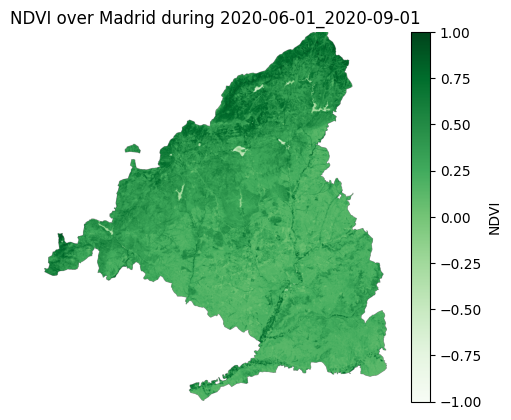

In [26]:
plt.figure()
plt.imshow(real_out_image[0], cmap='Greens', vmin=-1, vmax=1)
plt.colorbar(label="NDVI")
plt.title(f"NDVI over {cityname} during {timeperiod}")
plt.axis('off')
plt.show()

In [27]:
mean_ndvi = np.nanmean(real_out_image[0])
print(f"Mean NDVI over {cityname} during {timeperiod}: {mean_ndvi:.3f}")

Mean NDVI over Madrid during 2020-06-01_2020-09-01: 0.329


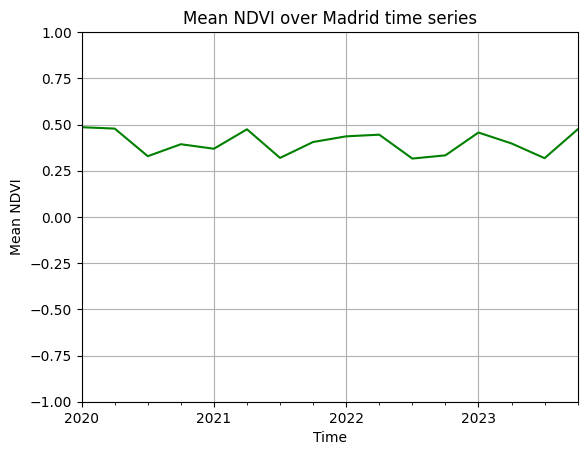

In [28]:
mean_ndvi_time_series = pd.Series(dtype=float)
for year in available_years:
    for quarter in available_quarters:
        timeperiod = quarter2timeperiod(year, quarter)
        filepath  = f"{ndvi_data_folder}ndvi_{timeperiod}.tif"
        date = pd.to_datetime(timeperiod.split("_")[1])
        current_real_out_image, _ = get_out_image_and_metadata(filepath, one_city_gdf)
        current_mean_ndvi = np.nanmean(current_real_out_image[0])
        mean_ndvi_time_series.loc[date] = current_mean_ndvi

mean_ndvi_time_series = mean_ndvi_time_series.sort_index()

plt.figure()
mean_ndvi_time_series.plot(color='green')
plt.title(f"Mean NDVI over {cityname} time series")
plt.ylabel("Mean NDVI")
plt.xlabel("Time")
plt.ylim(-1, 1)
plt.grid()
plt.show()

## Reproject ERA5-Land features on the NDVI grid

In [29]:
da = ds[datavar].sel(valid_time=day)
da

<xarray.DataArray 't2m' (latitude: 350, longitude: 660)> Size: 924kB
dask.array<getitem, shape=(350, 660), dtype=float32, chunksize=(22, 42), chunktype=numpy.ndarray>
Coordinates:
  * latitude    (latitude) float64 3kB 69.9 69.8 69.7 69.6 ... 35.2 35.1 35.0
  * longitude   (longitude) float64 5kB -25.0 -24.9 -24.8 ... 40.7 40.8 40.9
    number      int64 8B 0
    valid_time  datetime64[ns] 8B 2020-06-01
Attributes: (12/32)
    GRIB_paramId:                             167
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      6483600
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                2 metre temperature
    units:                                    K
    standard_name:                            unknown
    GRIB_surface:                             0.0

In [30]:
origin_transform = from_bounds(
    ds.longitude.min().item(),
    ds.latitude.min().item(),
    ds.longitude.max().item(),
    ds.latitude.max().item(),
    len(ds.longitude),
    len(ds.latitude)
)
origin_crs = "EPSG:4326"

target_transform = out_meta["transform"]
target_crs = out_meta["crs"]

In [31]:
reprojected_da = da.rio.write_crs(origin_crs).rio.reproject(
    dst_crs=target_crs,
    shape=(out_meta["height"], out_meta["width"]),
    transform=target_transform,
)

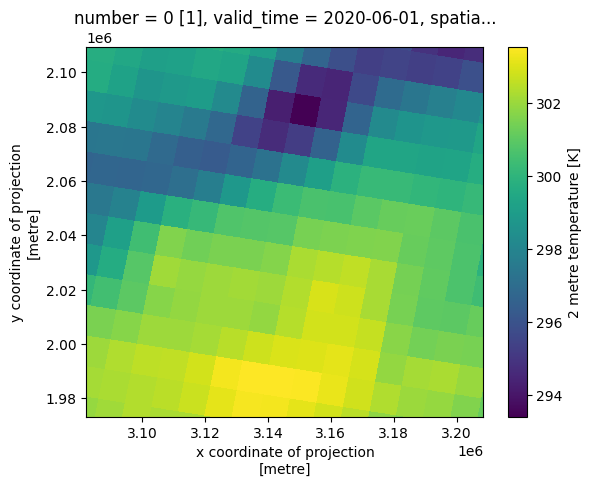

In [32]:
reprojected_da.plot()

# Blended European Climate Assessment datasets

The data stems from the [European Climate Assessment & Dataset project website](https://www.ecad.eu/dailydata/predefinedseries.php).

The example dataset is "Daily maximum temperature TX" (ie. `ECA_blend_tx`).

In [33]:
eca_tx_datafolder = main_data_folder + "ECA_blend_tx/"
stations_filepath = eca_tx_datafolder + "stations.txt"

## Filter weather stations

In [34]:
def dms_to_decimal(dms_str):
    # This function converts a DMS (Degrees:Minutes:Seconds) string to decimal degrees.
    dms_str = dms_str.strip()
    
    sign = 1 if dms_str[0] == '+' else -1
    
    dms_str = dms_str[1:]
    
    parts = dms_str.split(':')
    degrees = float(parts[0])
    minutes = float(parts[1])
    seconds = float(parts[2])
    
    decimal = sign * (degrees + minutes/60 + seconds/3600)
    
    return decimal

In [35]:
stations_df = pd.read_csv(
    stations_filepath,
    skiprows=17,
    skipinitialspace=True
)

stations_df['LAT_decimal'] = stations_df['LAT'].apply(dms_to_decimal)
stations_df['LON_decimal'] = stations_df['LON'].apply(dms_to_decimal)

stations_gdf = gpd.GeoDataFrame(
    stations_df,
    geometry=gpd.points_from_xy(stations_df['LON_decimal'], stations_df['LAT_decimal']),
    crs="EPSG:4326" # (WGS84, adequate for lat/lon coordinates)
).drop(columns=['LAT', 'LON', 'LAT_decimal', 'LON_decimal'])

print(f"Number of registered stations: {len(stations_gdf)}")
stations_gdf.head()

Number of registered stations: 8568


,STAID,STANAME,CN,HGHT,geometry
0,1,VAEXJOE,SE,166,POINT (14.8 56.86667)
1,2,FALUN,SE,160,POINT (15.61667 60.61667)
2,3,STENSELE,SE,325,POINT (17.16639 65.06667)
3,4,LINKOEPING,SE,93,POINT (15.53306 58.4)
4,5,LINKOEPING-MALMSLAETT,SE,93,POINT (15.53306 58.4)


In [ ]:
one_city_gdf.to_crs(stations_gdf.crs, inplace=True) # Use same CRS for spatial operations

stations_in_city_gdf = stations_gdf[stations_gdf.within(one_city_gdf.geometry.iloc[0])]

print(f"Number of registered stations within {cityname}: {len(stations_in_city_gdf)}")
stations_in_city_gdf.head()

Number of registered stations within Madrid: 21


,STAID,STANAME,CN,HGHT,geometry
7844,27223,SOMOSIERRA,ES,1450,POINT (-3.58056 41.13556)


## Manipulate and vizualize

In [37]:
# Select a station to study
selected_station = stations_in_city_gdf.iloc[9]

In [38]:
selected_station_gdf = gpd.GeoDataFrame([selected_station], crs=stations_in_city_gdf.crs)
selected_station_STAID = selected_station['STAID']

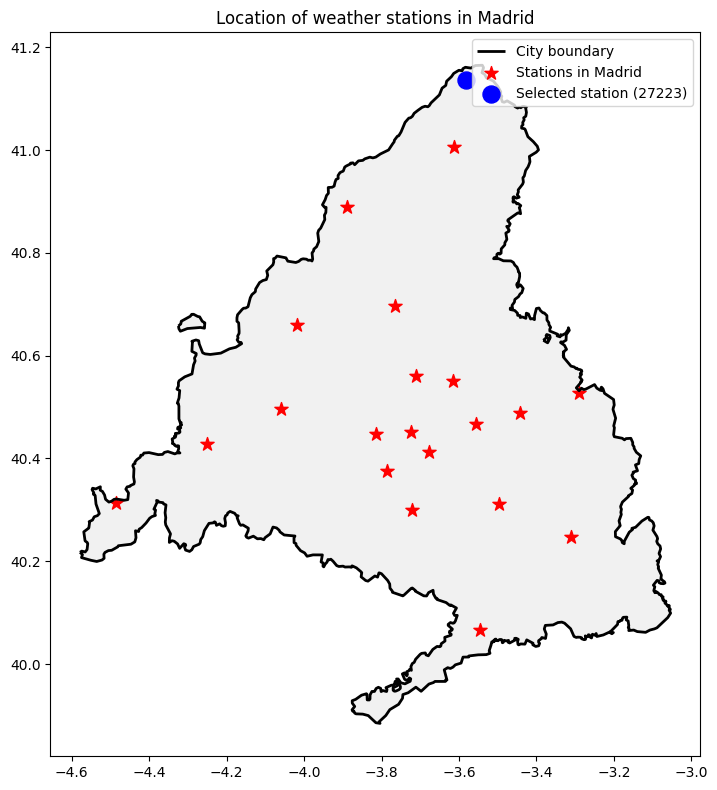

In [39]:
fig, ax = plt.subplots(figsize=(10, 8))

one_city_gdf.boundary.plot(ax=ax, color='black', linewidth=2, label='City boundary')
one_city_gdf.plot(ax=ax, alpha=0.3, color='lightgray')

stations_in_city_gdf.plot(ax=ax, color='red', markersize=100, marker='*', label=f'Stations in {cityname}')
selected_station_gdf.plot(ax=ax, color='blue', markersize=150, marker='o', label=f'Selected station ({selected_station_STAID})')

plt.legend()
plt.title(f"Location of weather stations in {cityname}")
plt.tight_layout()
plt.show()

In [40]:
station_data_filepath = eca_tx_datafolder + f"TX_STAID{selected_station_STAID:06d}.txt"

In [41]:
station_data_df = pd.read_csv(
    station_data_filepath,
    skiprows=20,
    skipinitialspace=True
)

valid_data_df = station_data_df[station_data_df['Q_TX'] == 0].copy() # Q_TX is the quality code for TX (0='valid')
valid_data_df['DATE'] = pd.to_datetime(valid_data_df['DATE'], format='%Y%m%d')
valid_data_df['TX_celsius'] = valid_data_df['TX'] / 10 # Convert temperature to °C (originally stored in 0.1°C unit)

tx_timeseries = pd.Series(
    valid_data_df['TX_celsius'].values,
    index=valid_data_df['DATE']
)

print(f"Number of valid daily records for station {selected_station_STAID}: {len(tx_timeseries)}")

Number of valid daily records for station 27223: 5992


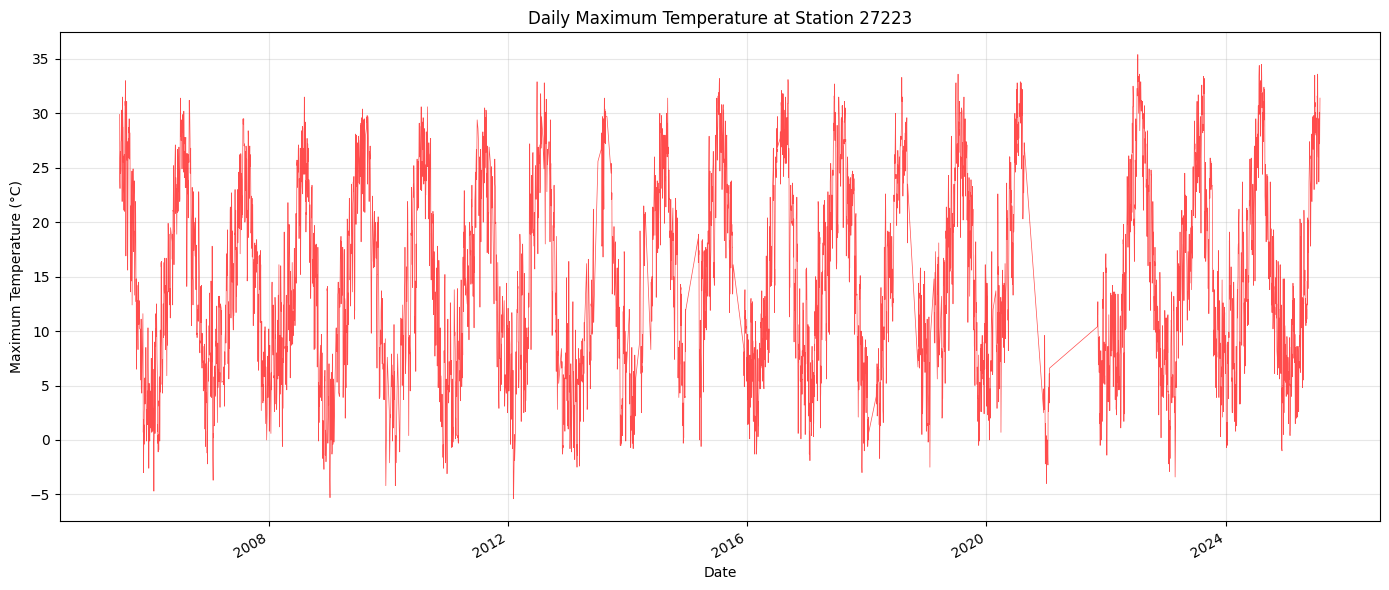

In [42]:
plt.figure(figsize=(14, 6))
tx_timeseries.plot(color='red', linewidth=0.5, alpha=0.7)
plt.title(f"Daily Maximum Temperature at Station {selected_station_STAID}")
plt.ylabel("Maximum Temperature (°C)")
plt.xlabel("Date")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()